In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn . discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


# 1. load data
df = pd.read_csv("Diabetes dataset.csv")
df = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "Outcome"]]
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
0,148,72,35,0,1
1,85,66,29,0,0
2,183,64,0,0,1
3,89,66,23,94,0
4,137,40,35,168,1


In [64]:
# 1. split into healthy and unhealthy
df_0 = df[df.Outcome == 0]
df_0.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
1,85,66,29,0,0
3,89,66,23,94,0
5,116,74,0,0,0
7,115,0,0,0,0
10,110,92,0,0,0


In [65]:
df_1 = df[df.Outcome == 1]
df_1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
0,148,72,35,0,1
2,183,64,0,0,1
4,137,40,35,168,1
6,78,50,32,88,1
8,197,70,45,543,1


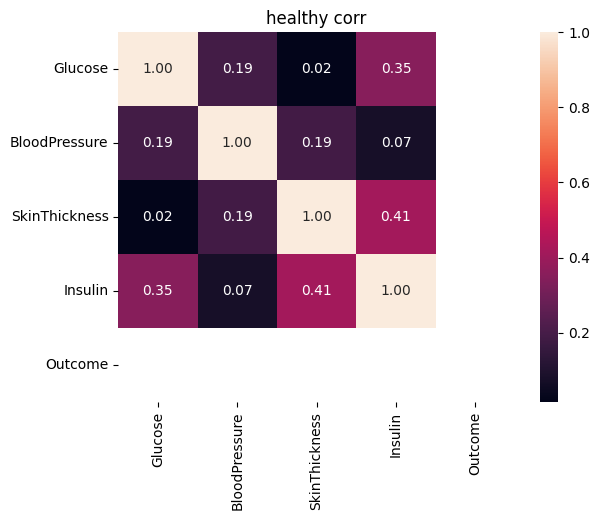

In [66]:
# 2. visual correlation
sns.heatmap(df_0.corr(),annot=True,fmt=".2f")
plt.title("healthy corr")
plt.show()

# 3  for health
# a) Insulin --- SkinThickness  -- highest
# b) Glucose ----SkinThickness  ----lowest

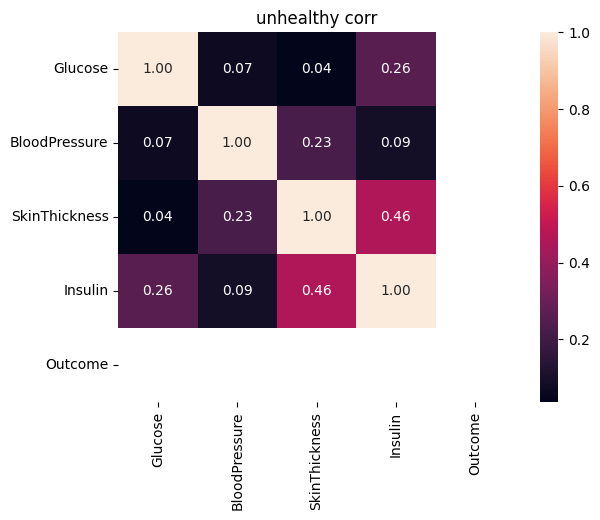

In [67]:
# for unhealthy
sns.heatmap(df_1.corr(),annot=True,fmt=".2f")
plt.title("unhealthy corr")
plt.show()

# 3  for unhealth
# c) Insulin --- SkinThickness  -- highest
# d) Glucose ----SkinThickness  ----lowest
# e) the results are the same

In [68]:
# 4 -- health
df_0.mean(), df_0.std()

(Glucose          109.980
 BloodPressure     68.184
 SkinThickness     19.664
 Insulin           68.792
 Outcome            0.000
 dtype: float64,
 Glucose          26.141200
 BloodPressure    18.063075
 SkinThickness    14.889947
 Insulin          98.865289
 Outcome           0.000000
 dtype: float64)

In [69]:
# 4 -- unhealth
df_1.mean(), df_1.std()

(Glucose          141.257463
 BloodPressure     70.824627
 SkinThickness     22.164179
 Insulin          100.335821
 Outcome            1.000000
 dtype: float64,
 Glucose           31.939622
 BloodPressure     21.491812
 SkinThickness     17.679711
 Insulin          138.689125
 Outcome            0.000000
 dtype: float64)

In [70]:
# 4 -- whole
df.mean(), df.std()

(Glucose          120.894531
 BloodPressure     69.105469
 SkinThickness     20.536458
 Insulin           79.799479
 Outcome            0.348958
 dtype: float64,
 Glucose           31.972618
 BloodPressure     19.355807
 SkinThickness     15.952218
 Insulin          115.244002
 Outcome            0.476951
 dtype: float64)

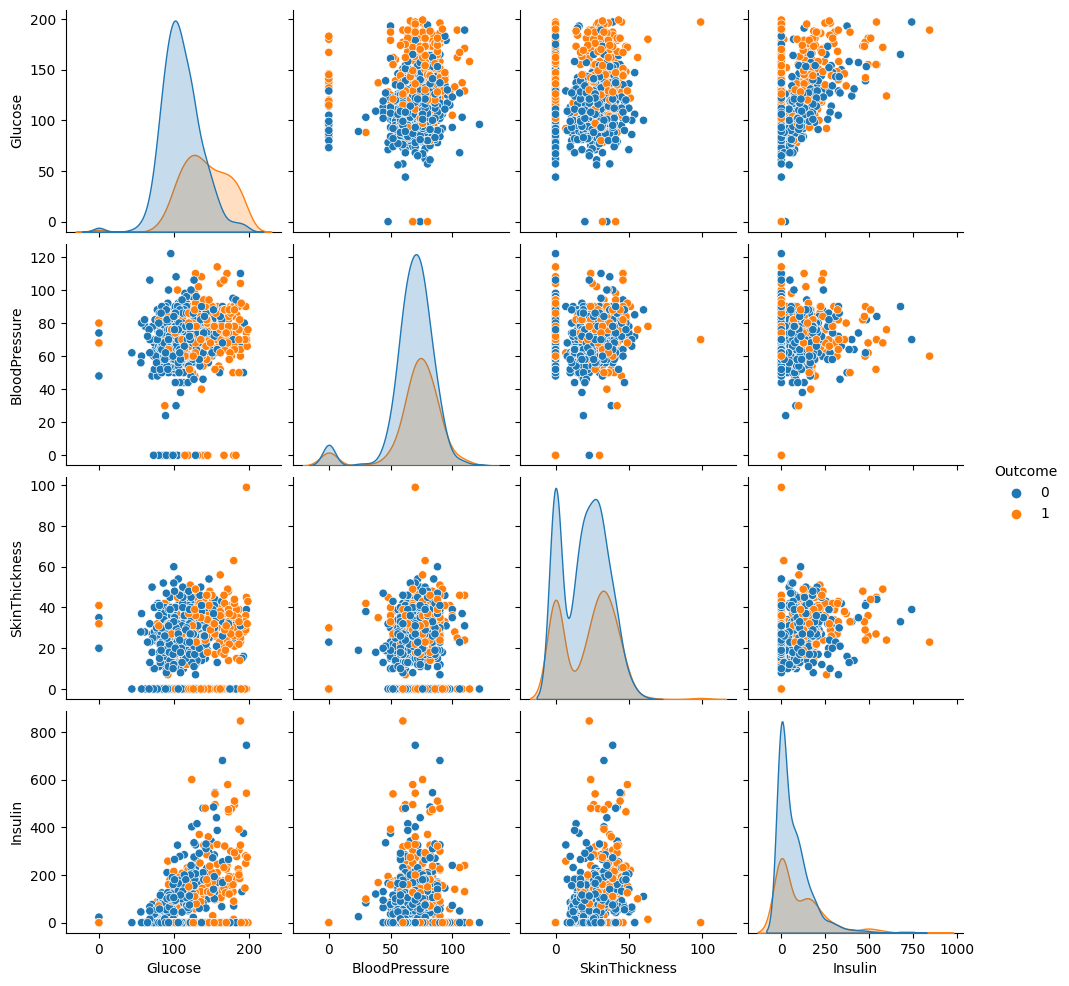

In [71]:
# 5
sns.pairplot(df,hue='Outcome')
plt.show()

# from the data above and figure below
#  Unhealthy has higher Glucose and Insulin  level

In [72]:
## start of Question 3

In [73]:
# 1.---
X = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "Outcome"]].values
Y = df["Outcome"].values

X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,
                                test_size =0.3 , random_state =3)


In [74]:
# 1
lr = LogisticRegression(). fit ( X_train , Y_train )
prediction = lr . predict ( X_test )
acc = np. mean ( prediction == Y_test )
tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print("LogisticRegression")
tn, fp, fn, tp , acc, tpr, tnr

LogisticRegression


(133, 0, 0, 98, 1.0, 1.0, 1.0)

In [75]:
# 2
from sklearn.neighbors import KNeighborsClassifier
for k_param in [1, 3, 5]:
#     k_param = 1
    knn = KNeighborsClassifier(n_neighbors=k_param).fit(X_train , Y_train)
    prediction = knn . predict ( X_test )
    acc = np. mean ( prediction == Y_test )
    tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print("KNeighborsClassifier, k=", k_param)
    print(tn, fp, fn, tp , acc, tpr, tnr)
    print("=====================================\n")

KNeighborsClassifier, k= 1
115 18 63 35 0.6493506493506493 0.35714285714285715 0.8646616541353384

KNeighborsClassifier, k= 3
111 22 58 40 0.6536796536796536 0.40816326530612246 0.8345864661654135

KNeighborsClassifier, k= 5
113 20 54 44 0.6796536796536796 0.4489795918367347 0.849624060150376



In [76]:
# 3
NB_classifier = GaussianNB (). fit ( X_train , Y_train )
prediction = NB_classifier . predict ( X_test )
acc = np. mean ( prediction == Y_test )
tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print("bayesian")
tn, fp, fn, tp , acc, tpr, tnr

bayesian


(133, 0, 0, 98, 1.0, 1.0, 1.0)

In [77]:
# 4
    
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


scaler = StandardScaler (). fit (X)
X = scaler.transform (X)
X_test = scaler.transform(X_test)

lda_classifier = LDA( )
lda_classifier .fit(X,Y)


prediction = lda_classifier.predict ( X_test )
acc = np. mean ( prediction == Y_test )
tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print("LDA")
tn, fp, fn, tp , acc, tpr, tnr

LDA


(133, 0, 0, 98, 1.0, 1.0, 1.0)

In [79]:
# 5
from sklearn . discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_classifier = QDA (store_covariance=True)
qda_classifier .fit (X,Y)


prediction = qda_classifier.predict ( X_test )
acc = np. mean ( prediction == Y_test )
tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print("QDA")
tn, fp, fn, tp , acc, tpr, tnr

QDA


d:\Users\xzxing\Anaconda3\envs\d2l_zh\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(133, 0, 0, 98, 1.0, 1.0, 1.0)

In [80]:
# 6 copy above result into table

# 7 ...